![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# KING COUNTY HOME PRICE PREDICTION

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders? 

Real estate agency helping home buyers.

- What are your stakeholders' pain points related to this project?

- Why are your predictions important from a business perspective?

In [1]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from geopy import distance


In [2]:
# importing utility functions
# from utils import evaluate
# OR
# import utils as ut

In [3]:
# # utils.py
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(y_train, train_preds, y_test, test_preds):
    '''
    Evaluate the amount of error between my model's predictionms and the actual values
    for both a train and a test set
    
    Inputs: 
        y_train - array like, actual values for 'price for my train dataset
        train_preds - array like, predicted values for 'price' for my train dataset
        y_test
        test_preds
    
    Outputs:
        None
    '''
    print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
    print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
    print("*****")
    print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
    print(f"Train RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
    print("*****")
    print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
    print(f"Train MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")
    print("*****")
    
    # Calculate our residuals 
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds
    
    # Scatter plot 
    plt.scatter(train_preds, train_residuals, label = 'Train')
    plt.scatter(test_preds, test_residuals, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    
    sm.qqplot(train_residuals, line = 'r', label = 'train residuals');
    plt.legend()
    
    sm.qqplot(test_residuals, line = 'r', label = 'test residuals');
    plt.legend()
    plt.show()
    
    

In [4]:
!ls ../../data

column_names.md
kc_house_data.csv


In [5]:
# To visualize the hidden columns in data
pd.options.display.max_columns=100 

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [6]:
# code here to explore your data
df = pd.read_csv("../../data/kc_house_data.csv")

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.shape

(21597, 21)

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Price is the target variable for our business problem.

The data includes Kings County houses' information and sell prices from 1900 to 2015.

In [10]:
#sns.pairplot(df)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [11]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [12]:
df[df['id']==795000620] # Multiple rows for same house means that the house is sold multiple times!

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,Fair,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


We should keep the multiple rows to reflect price change over the years. 

In [13]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


It is impossible to have 33 bedrooms house with 1620 sqrt living area and 1 floor. There must be typing error. We should replace 33 with the mean of number of bedrooms, which is 3.

In [15]:
df['bedrooms'].replace(33, 3, inplace=True)

In [16]:
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [17]:
df[df['bedrooms']==11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.0,3000,4960,2.0,NO,NONE,Average,7 Average,2400,600.0,1918,1999.0,98106,47.556,-122.363,1420,4960


In [18]:
df[df['bedrooms']==10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,NO,AVERAGE,Average,9 Better,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,NO,NONE,Good,7 Average,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,NO,NONE,Good,7 Average,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


In [19]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [20]:
df['grade_int'] = df['grade'].str[:2].astype('int64')

In [21]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [22]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [23]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [24]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1481.0        1
862.0         1
1913.0        1
225.0         1
1816.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [25]:
# sqft_basement has ? as a value, we should 
df[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,7
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,NO,NONE,Good,7 Average,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095,7
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,NO,NONE,Average,9 Better,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639,9
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,NO,NONE,Average,10 Very Good,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750,10
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,NO,NONE,Good,7 Average,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,NO,NONE,Average,7 Average,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009,7
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,NO,NONE,Average,7 Average,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836,7
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,NONE,Average,8 Good,980,?,2008,0.0,98117,47.6844,-122.387,980,1023,8
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,NO,NONE,Average,7 Average,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396,7


In [26]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

#### Check null values in the dataframe

In [27]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_int           0
dtype: int64

The columns named as waterfront, view, and yr_renovated have null values.

In [28]:
# waterfront indicates Whether the house is on a waterfront
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [29]:
df[(df['waterfront']!= 'YES') & (df['waterfront']!= 'NO')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,NONE,Average,8 Good,1860,1700,1965,0.0,98007,47.6007,-122.145,2210,8925,8
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,Average,7 Average,1070,0,1985,NaN,98030,47.3533,-122.166,1220,8386,7
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,NONE,Average,9 Better,2570,0,2000,NaN,98074,47.6145,-122.027,2470,5669,9
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,NONE,Average,9 Better,2830,0,1995,0.0,98105,47.6597,-122.290,1950,5000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,Average,8 Good,2500,0,2008,0.0,98042,47.3749,-122.107,2530,5988,8
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,Average,9 Better,3118,0,2014,0.0,98001,47.2931,-122.264,2673,6500,9
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,Average,6 Low Average,1500,0,2014,0.0,98010,47.3095,-122.002,1320,11303,6
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,Average,8 Good,2270,0,2003,0.0,98065,47.5389,-121.881,2270,5731,8


Let's convert YES value as 1, NO value as 0, and also replace NaN values with 0:

In [30]:
df['waterfront'].replace("YES", 1, inplace=True)

In [31]:
df['waterfront'].replace("NO", 0, inplace=True)

In [32]:
df['waterfront'].fillna(value=0,inplace=True)

In [33]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [34]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_int           0
dtype: int64

In [35]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [36]:
df['view'].fillna(value="None",inplace=True)

We replaced null values of views of the column as None.

In [37]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the houses are not renovated, so we can replace NaN values with zero.

In [38]:
df['yr_renovated'].fillna(value=0,inplace=True)

We will create distance to city center measure for each house. For distance, we used Google Maps Downtown Seattle coordinates 47.6050° N, 122.3344° W to calculated the mileage from a given property to the center of downtown.

In [39]:
distance_data= []
for i in df.index:
    location = (df.loc[i]['lat'],df.loc[i]['long'])
    downtown = (47.6050, -122.3344)
    dist = distance.distance(location, downtown).miles
    distance_data.append(dist)

df['distance'] = distance_data

In [40]:
df['house_age'] = [2016]*len(df['yr_built']) - df['yr_built']

In [41]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
grade_int        0
distance         0
house_age        0
dtype: int64

We cleaned all of the missing values from our dataframe.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The columns named 'date', 'view', 'condition', and 'grade' are stored as objects, not numerical values.

In [43]:
df.select_dtypes(include = 'object')

,date,view,condition,grade
0,10/13/2014,NONE,Average,7 Average
1,12/9/2014,NONE,Average,7 Average
2,2/25/2015,NONE,Average,6 Low Average
3,12/9/2014,NONE,Very Good,7 Average
4,2/18/2015,NONE,Average,8 Good
...,...,...,...,...
21592,5/21/2014,NONE,Average,8 Good
21593,2/23/2015,NONE,Average,8 Good
21594,6/23/2014,NONE,Average,7 Average
21595,1/16/2015,NONE,Average,8 Good


In [44]:
# Split up 'condition', 'view' and 'grade' columns: Change them from object datatype to numerical datatype for analysis:
# These columns have multiple categories and they will need to be expanded into multiple columns.

In [45]:
# Create a variable for view column
view_col = df[["view"]]
condition_df = df[["condition"]]
grade_df = df[['grade']]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe_view = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")
ohe_cond = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe_grade = OneHotEncoder(categories = 'auto', sparse=False, handle_unknown ='ignore')

# Fit the encoder on view_col
ohe_view.fit(view_col)
ohe_cond.fit(condition_df)
ohe_grade.fit(grade_df)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [46]:
# Transform view_col using the encoder and
# assign the result to view_col_encoded
view_col_encoded = ohe_view.transform(view_col)
condition_df_encoded = ohe_cond.transform(condition_df)
grade_encoded = ohe_grade.transform(grade_df)

In [47]:
# Make the transformed data into a dataframe
view_col_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_col_encoded,
    # Set the column names to the categories found by OHE
    columns="view_"+ohe_view.categories_[0],
    # Set the index to match df's index
    index=df.index
)
condition_df_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_df_encoded,
    # Set the column names to the categories found by OHE
    columns="cond_"+ohe_cond.categories_[0],
    # Set the index to match df's index
    index=df.index
)
grade_encoded = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded,
    # Set the column names to the categories found by OHE
    columns="grade_"+ohe_grade.categories_[0],
    # Set the index to match df's index
    index=df.index
)

In [48]:
# Drop original view column
df.drop("view", axis=1, inplace=True)
df.drop("condition", axis=1, inplace=True)
df.drop("grade", axis=1, inplace=True)

# Concatenate the new dataframe with current df
df = pd.concat([df, view_col_encoded, condition_df_encoded, grade_encoded], axis=1)

# Visually inspect df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int,distance,house_age,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_None,cond_Average,cond_Fair,cond_Good,cond_Poor,cond_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,7,7.422544,61,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,8.046186,65,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,6,10.329114,83,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,7,6.430056,51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,8,13.544634,29,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


By this work, we expanded 'condition', 'view', and 'grade' columns into multiple columns.

In [49]:
np.abs(df.corr()['price']).sort_values(ascending=False)

price                  1.000000
sqft_living            0.701917
grade_int              0.667951
sqft_above             0.605368
sqft_living15          0.585241
bathrooms              0.525906
grade_11 Excellent     0.357589
view_NONE              0.353770
grade_10 Very Good     0.340944
sqft_basement          0.323799
grade_7 Average        0.316053
bedrooms               0.315954
lat                    0.306692
view_EXCELLENT         0.303059
grade_12 Luxury        0.291068
distance               0.282131
waterfront             0.264306
floors                 0.256804
grade_9 Better         0.235859
grade_13 Mansion       0.211806
grade_6 Low Average    0.209463
view_GOOD              0.182932
view_AVERAGE           0.147179
yr_renovated           0.117855
view_FAIR              0.092597
sqft_lot               0.089876
grade_5 Fair           0.084549
sqft_lot15             0.082845
cond_Very Good         0.057531
house_age              0.053953
yr_built               0.053953
zipcode 

We see from the above correlation coefficients that, 'sqrt_living' column has the highest correlation coefficient with the 'price' column. If we want to build a simple linear regression model to predict 'price' of the houses, we should choose 'sqrt_living' as our independent variable.

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [50]:
X = df.drop(columns=['id', 'price'])
y = df['price']

In [51]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

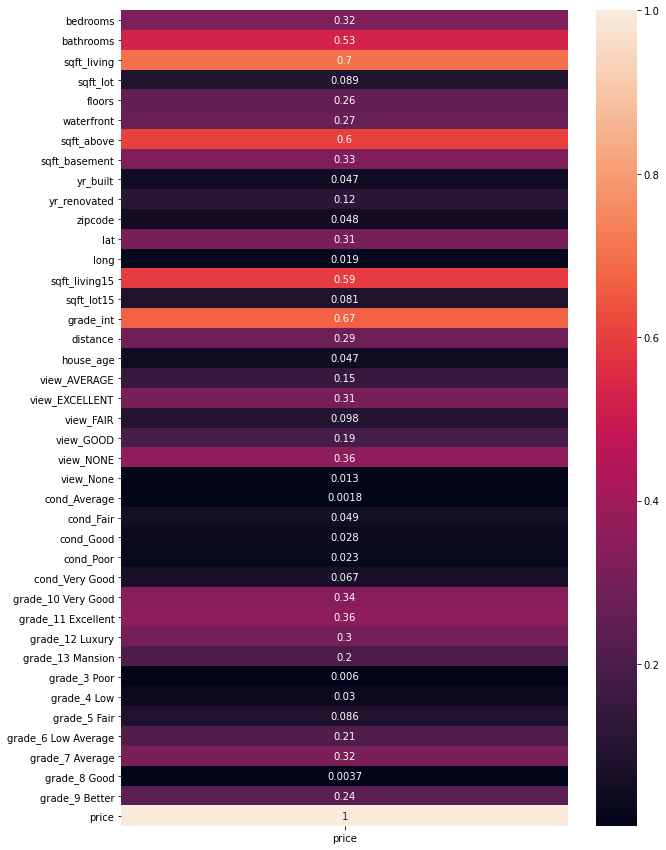

In [53]:
# Absolute value correlations with price
plt.figure(figsize=(10,15))
sns.heatmap(abs(train_df.corr())[['price']], annot=True);

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [54]:
# code here to arrive at a baseline prediction
train_target_mean = y_train.mean()
train_target_mean

541284.4615669568

In [55]:
baseline_train_preds = [train_target_mean]*len(y_train)

In [56]:
baseline_test_preds = [train_target_mean]*len(y_test)

Train R2: 0.0000
Test R2: -0.0001
*****
Train RMSE: $366,333.44
Train RMSE: $370,425.86
*****
Train MAE: $234,722.63
Train MAE: $233,000.84
*****


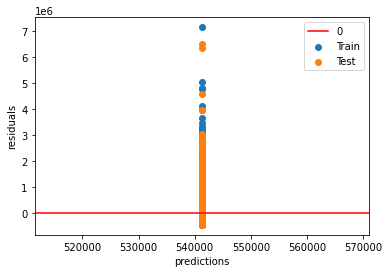

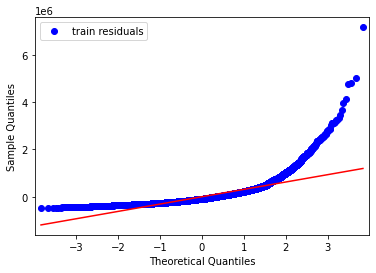

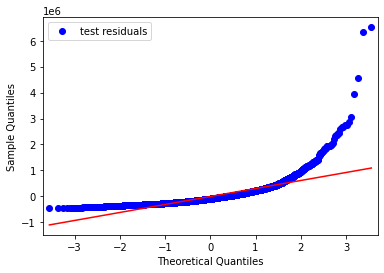

In [57]:
evaluate(y_train, baseline_train_preds, y_test, baseline_test_preds)

### First Substandard Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

-- Using 'sqft_living' column as a predictor for 'price' target variable.

In [58]:
# code here for your first 'substandard' model
fsm_X_train= X_train['sqft_living']
fsm_X_test = X_test['sqft_living']

In [59]:
# code here to evaluate your first 'substandard' model
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()

In [60]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:04:15   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

Train R2: 0.4906
Test R2: 0.4989
*****
Train RMSE: $261,471.87
Train RMSE: $262,216.52
*****
Train MAE: $174,170.69
Train MAE: $171,964.83
*****


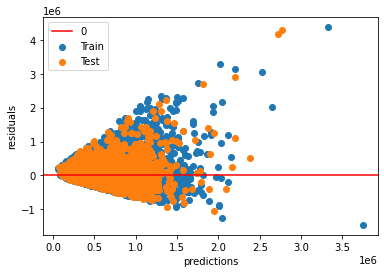

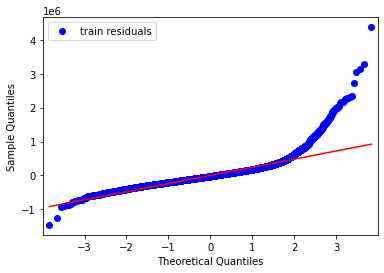

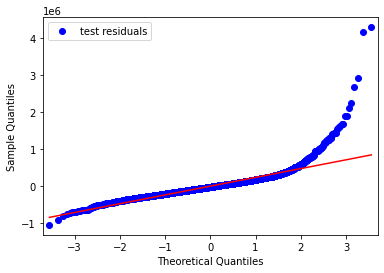

In [62]:
evaluate(y_train, fsm_train_preds, y_test, fsm_test_preds)

As seen from the residuals plot above, there is heteroskedasticity problem, which means that the spread of residuals is different at different levels of the fitted values. In order to overcome heteroskedasticity, we can do variable transformation (i.e. log transformation) of the target column. 

In [63]:
logged_fsm_y_train= np.log(y_train)
logged_fsm_y_test= np.log(y_test)

In [64]:
fsm_logged = sm.OLS(logged_fsm_y_train, sm.add_constant(fsm_X_train)).fit()

In [65]:
fsm_logged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.514e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:04:18   Log-Likelihood:                -7274.1
No. Observations:               16197   AIC:                         1.455e+04
Df Residuals:                   16195   BIC:                         1.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2179      0.007   1653.638      0.000      12.203      12.232
sqft_living     0.0004   3.24e-06    123.040      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                2.122
Skew:                           0.025   Prob(JB):                        0.346
Kurtosis:                       3.026   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
logged_fsm_train_preds = fsm_logged.predict(sm.add_constant(fsm_X_train))
logged_fsm_test_preds = fsm_logged.predict(sm.add_constant(fsm_X_test))

Train R2: 0.4831
Test R2: 0.4836
*****
Train RMSE: $0.38
Train RMSE: $0.38
*****
Train MAE: $0.31
Train MAE: $0.31
*****


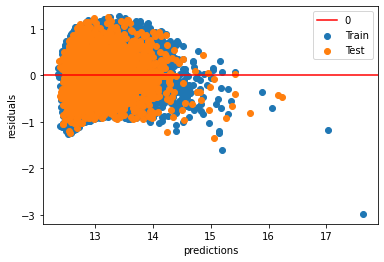

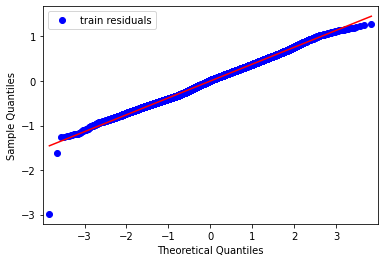

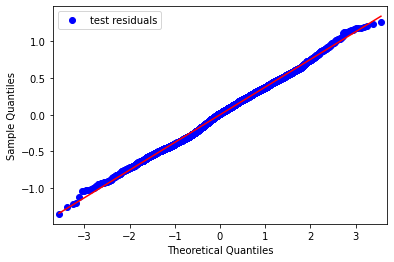

In [67]:
evaluate(logged_fsm_y_train, logged_fsm_train_preds, logged_fsm_y_test, logged_fsm_test_preds)

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

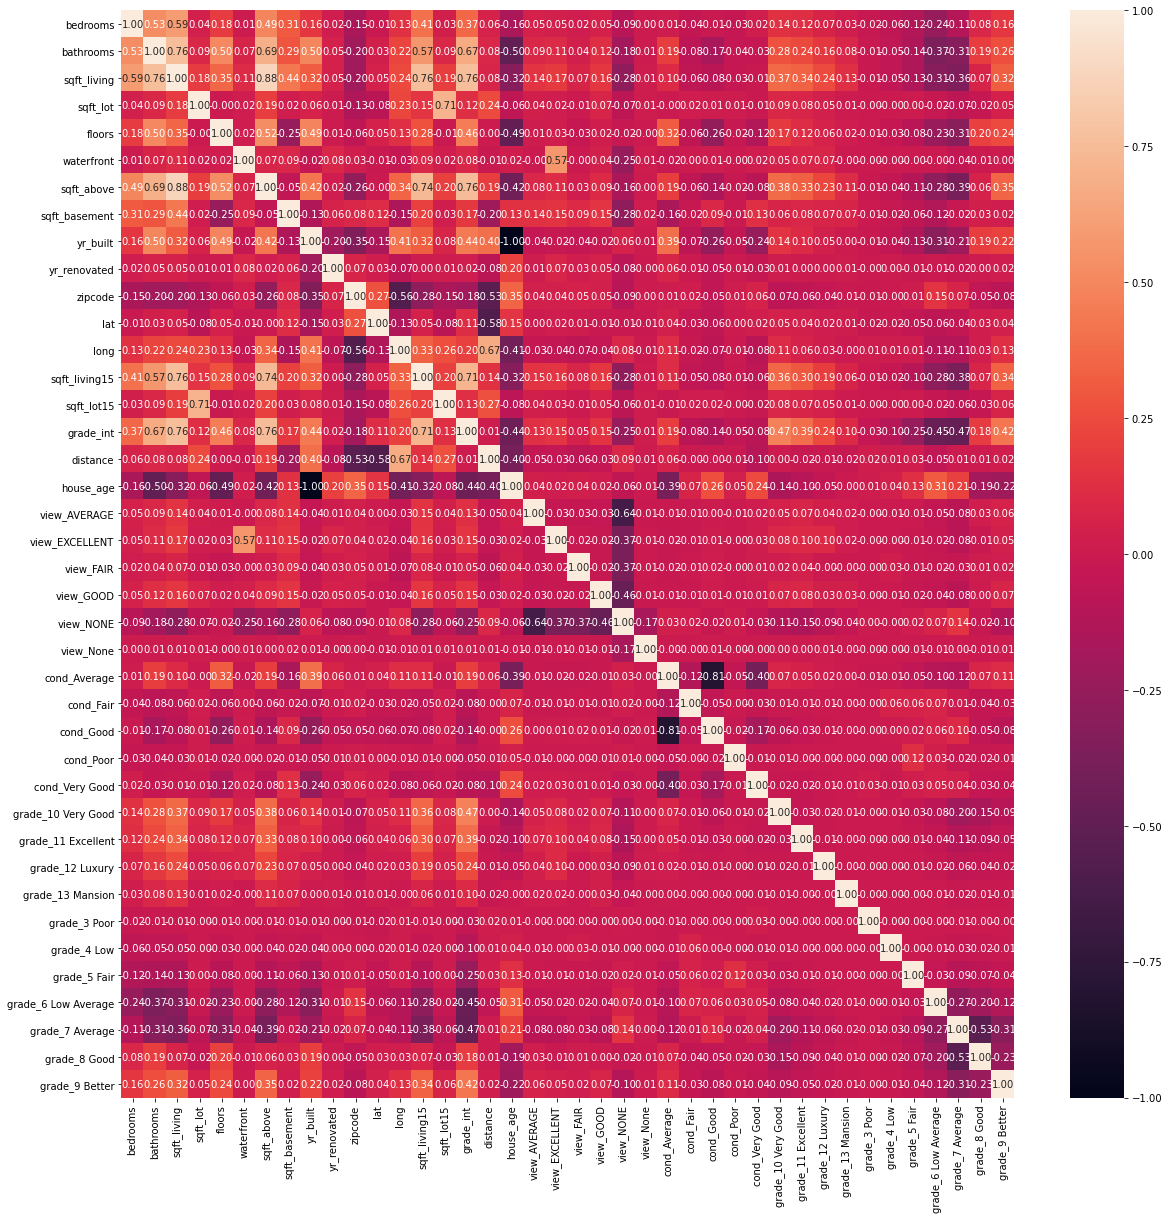

In [68]:
# Let's start looking into correlation matrix to decide new independent variables and check multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f');

For better analysis, we decided to add more independent variables to the model. 

#### MODEL 1
We will use 'sqft_living' and 'house_age' columns for the analysis.  

In [69]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int,distance,house_age,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_None,cond_Average,cond_Fair,cond_Good,cond_Poor,cond_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
count,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,3.372229,2.116426,2083.693030,1.507189e+04,1.494752,0.006853,1790.467926,293.225103,1971.019942,67.419522,98078.100080,47.560975,-122.213720,1987.809286,12784.065074,7.658702,11.506439,44.980058,0.042909,0.015126,0.015126,0.023338,0.900475,0.003025,0.649812,0.007964,0.261653,0.001111,0.079459,0.052541,0.018213,0.004260,0.000494,0.000062,0.001050,0.011607,0.092980,0.414768,0.284497,0.119528
std,0.905951,0.768049,918.209756,4.077585e+04,0.540474,0.082502,827.598600,443.148845,29.325399,360.641442,53.486457,0.138273,0.141639,685.189105,26833.379871,1.169277,6.616668,29.325399,0.202659,0.122059,0.122059,0.150978,0.299374,0.054921,0.477044,0.088890,0.439548,0.033319,0.270462,0.223121,0.133726,0.065132,0.022219,0.007857,0.032381,0.107112,0.290414,0.492697,0.451189,0.324419
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,3.000000,0.719565,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.058000e+03,1.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.329000,1490.000000,5100.000000,7.000000,6.110622,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.250000,1912.000000,7.620000e+03,1.500000,0.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.573300,-122.231000,1840.000000,7620.000000,7.000000,10.354929,41.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,0.000000,2220.000000,570.000000,1997.000000,0.000000,98117.000000,47.678300,-122.124000,2360.000000,10086.000000,8.000000,15.733307,64.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,13.000000,48.161387,116.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
X_test.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int,distance,house_age,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_None,cond_Average,cond_Fair,cond_Good,cond_Poor,cond_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
count,5400.000000,5400.000000,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.0,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,3.370556,2.114028,2070.210185,1.518194e+04,1.492130,0.006481,1782.984630,287.225556,1970.938889,72.773519,98077.507222,47.557447,-122.214770,1983.054074,12680.953148,7.655556,11.530573,45.061111,0.048519,0.013333,0.015741,0.024074,0.895741,0.002593,0.647222,0.007593,0.266481,0.002037,0.076667,0.052407,0.019259,0.003704,0.000926,0.0,0.001852,0.010000,0.098519,0.417778,0.269815,0.125741
std,0.898592,0.771851,917.805949,4.327026e+04,0.537347,0.080254,828.294279,441.232142,29.526848,374.044172,53.595322,0.139365,0.137951,685.405621,28558.979278,1.184994,6.588180,29.526848,0.214879,0.114708,0.124482,0.153293,0.305625,0.050856,0.477879,0.086812,0.442160,0.045092,0.266086,0.222868,0.137448,0.060751,0.030418,0.0,0.042997,0.099508,0.298042,0.493239,0.443905,0.331588
min,1.000000,0.750000,410.000000,6.090000e+02,1.000000,0.000000,410.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.515000,670.000000,659.000000,4.000000,0.721647,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1420.000000,5.001000e+03,1.000000,0.000000,1190.000000,0.000000,1951.000000,0.000000,98032.000000,47.465725,-122.327000,1480.000000,5100.000000,7.000000,6.133444,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,0.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.568900,-122.228000,1830.000000,7619.500000,7.000000,10.335379,41.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2520.000000,1.058800e+04,2.000000,0.000000,2200.000000,550.000000,1997.000000,0.000000,98118.000000,47.677500,-122.127000,2370.000000,10080.000000,8.000000,15.881751,65.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,10.000000,7.750000,10040.000000,1.164794e+06,3.000000,1.000000,8860.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,5790.000000,858132.000000,13.000000,48.143087,116.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
train_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int,distance,house_age,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_None,cond_Average,cond_Fair,cond_Good,cond_Poor,cond_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,price
6405,3/4/2015,3,2.50,1880,4499,2.0,0.0,1880,0,1993,0.0,98029,47.5664,-121.999,2130,5114,8,15.901805,23,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,529000.0
937,10/7/2014,3,2.50,2020,6564,1.0,0.0,1310,710,1994,0.0,98042,47.3545,-122.158,1710,5151,7,19.176453,22,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,253000.0
19076,1/16/2015,5,4.00,4720,493534,2.0,0.0,3960,760,1975,0.0,98027,47.4536,-122.009,2160,219542,9,18.472041,41,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,745000.0
15201,3/30/2015,2,2.00,1430,3880,1.0,0.0,1430,0,1949,0.0,98117,47.6844,-122.392,1430,3880,7,6.109163,67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,545000.0
13083,10/14/2014,3,2.25,2270,32112,1.0,0.0,1740,530,1980,0.0,98042,47.3451,-122.094,2310,41606,8,21.193550,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,390000.0


In [72]:
test_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int,distance,house_age,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_None,cond_Average,cond_Fair,cond_Good,cond_Poor,cond_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,price
3686,2/20/2015,3,0.75,850,8573,1.0,0.0,600,250,1945,0.0,98146,47.5030,-122.356,850,8382,6,7.118718,71,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,132500.0
10247,10/8/2014,3,1.00,1510,6083,1.0,0.0,860,650,1940,0.0,98115,47.6966,-122.324,1510,5712,6,6.346895,76,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,415000.0
4037,3/25/2015,4,2.25,1790,42000,1.0,0.0,1170,620,1983,0.0,98045,47.4819,-121.744,2060,50094,7,28.897193,33,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,494000.0
3437,2/17/2015,2,1.50,1140,2500,1.0,0.0,630,510,1988,0.0,98106,47.5707,-122.359,1500,5000,7,2.633838,28,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,355000.0
19291,5/23/2014,3,1.00,1500,3920,1.0,0.0,1000,500,1947,0.0,98107,47.6718,-122.359,1640,4017,7,4.755751,69,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,606000.0


Let's start filtering dataframes by choosing the relevant columns.

In [73]:
relevant_columns = ['price', 'sqft_living', 'house_age']

In [74]:
model1_train_df = train_df[relevant_columns]

In [75]:
model1_test_df= test_df[relevant_columns]

In [76]:
model1_X_train = model1_train_df[['sqft_living',  'house_age']]
model1_y_train = np.log(model1_train_df['price'])

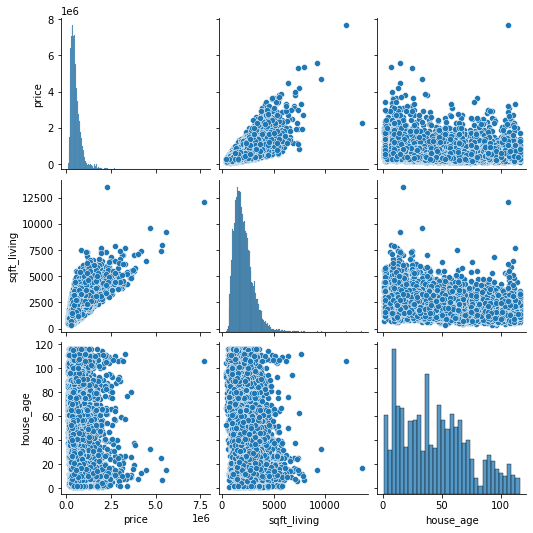

In [77]:
sns.pairplot(model1_train_df[['price', 'sqft_living','house_age']]);

In [78]:
model1 = sm.OLS(model1_y_train, sm.add_constant(model1_X_train)).fit()

In [79]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     8342.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:05:22   Log-Likelihood:                -6883.9
No. Observations:               16197   AIC:                         1.377e+04
Df Residuals:                   16194   BIC:                         1.380e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0229      0.010   1204.972      0.000      12.003      12.042
sqft_living     0.0004   3.34e-06    128.522      0.000       0.000       0.000
house_age       0.0030      0.000     28.275      0.000       0.003       0.003
==============================================================================
Omnibus:                       84.539   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.788
Skew:                          -0.119   Prob(JB):                     3.54e-22
Kurtosis:                       3.300   Cond. No.                     7.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
model1_X_test = model1_test_df[['sqft_living', 'house_age']]
model1_y_test = np.log(model1_test_df['price'])

In [81]:
model1_train_preds = model1.predict(sm.add_constant(model1_X_train))
model1_test_preds = model1.predict(sm.add_constant(model1_X_test))

Train R2: 0.5075
Test R2: 0.4983
*****
Train RMSE: $0.37
Train RMSE: $0.37
*****
Train MAE: $0.30
Train MAE: $0.30
*****


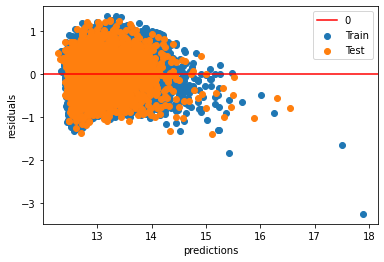

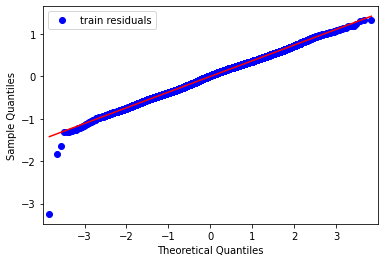

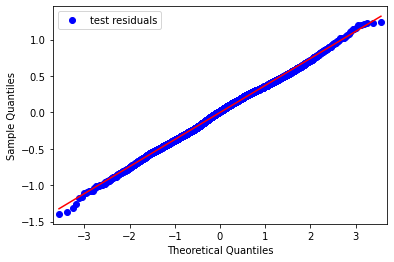

In [82]:
evaluate(model1_y_train, model1_train_preds, model1_y_test, model1_test_preds)

R2 is increased to 0.50, better than simple linear regression model. But not better enough. 

We used 'sqft_living' and 'house_age' as predictors, and used logged transformed version of price column as target variable.

#### MODEL 2

We will use 'sqft_living', 'house_age', and 'distance' columns for the analysis.  

In [83]:
relevant_columns2 = ['price', 'sqft_living', 'house_age', 'distance']

In [84]:
model2_train_df = train_df[relevant_columns2]

In [85]:
model2_test_df= test_df[relevant_columns2]

In [86]:
model2_X_train = model2_train_df[['sqft_living', 'house_age', 'distance']]
model2_y_train = np.log(model2_train_df['price'])

In [87]:
model2 = sm.OLS(model2_y_train, sm.add_constant(model2_X_train)).fit()

In [88]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     9754.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:05:26   Log-Likelihood:                -4260.2
No. Observations:               16197   AIC:                             8528.
Df Residuals:                   16193   BIC:                             8559.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.5522      0.011   1159.358      0.000      12.531      12.573
sqft_living     0.0004   2.84e-06    146.581      0.000       0.000       0.000
house_age   -3.339e-05   9.67e-05     -0.345      0.730      -0.000       0.000
distance       -0.0321      0.000    -78.712      0.000      -0.033      -0.031
==============================================================================
Omnibus:                      521.713   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              981.403
Skew:                          -0.251   Prob(JB):                    7.78e-214
Kurtosis:                       4.097   Cond. No.                     9.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
model2_X_test = model2_test_df[['sqft_living', 'house_age', 'distance']]
model2_y_test = np.log(model2_test_df['price'])

In [90]:
model2_train_preds = model2.predict(sm.add_constant(model2_X_train))
model2_test_preds = model2.predict(sm.add_constant(model2_X_test))

Train R2: 0.6438
Test R2: 0.6437
*****
Train RMSE: $0.31
Train RMSE: $0.31
*****
Train MAE: $0.25
Train MAE: $0.24
*****


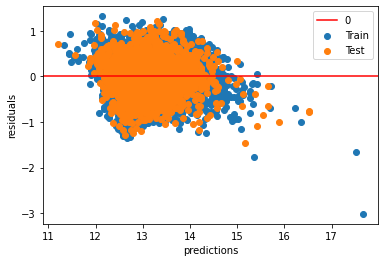

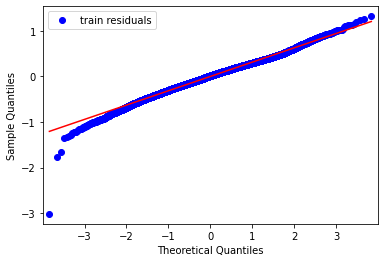

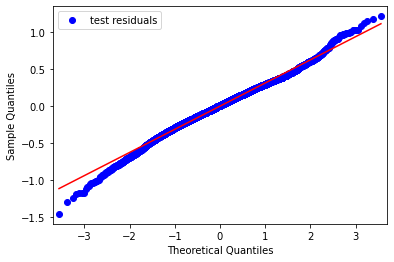

In [91]:
evaluate(model2_y_train, model2_train_preds, model2_y_test, model2_test_preds)

R2 increased to 0.64.

In [92]:
# # Import
# import plotly.express as px

# # Explore relationship between location and price
# fig = px.scatter_mapbox(data_frame = train_df, # df name
#                         lat='lat', # name of latitude column
#                         lon='long', # name of longitude column
#                         color='price', # name of column to use for the color
#                         zoom=8)
# fig.update_layout(mapbox_style="open-street-map")
# fig.show()

In [93]:
# # code here to iteratively improve your models
# from sklearn.feature_selection import SelectKBest, mutual_info_regression
# selector = SelectKBest(mutual_info_regression, k =2)
# selector.fit(X, y)
# X.columns[selector.get_support()]

In [94]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [95]:
# code here to show your final model

In [96]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
